In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import minmax_scale
from scipy.interpolate import CubicSpline

In [2]:
path = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\raw\\CLEAN_DATA\\'
os.listdir(path)

['data_Artana',
 'data_Beneixama',
 'data_Beniarda',
 'data_Bolulla',
 'data_Carcaixent',
 'data_Carcaixent_2',
 'data_Chella',
 'data_Gatova',
 'data_Llutxent',
 'data_Llutxent_2',
 'data_Montan',
 'data_ValldEbo',
 'data_VallGallinera']

In [3]:
df_time = pd.read_csv('time_init_end.csv')

In [4]:
df_time['Inicio'] = pd.to_datetime(df_time['Dia Inicio'] + ' ' + df_time['Hora inicio'], format='%Y/%m/%d %H:%M')
df_time['Fin'] = pd.to_datetime(df_time['Dia Fin'] + ' ' + df_time['Hora fin'], format='%Y/%m/%d %H:%M')

In [5]:
df_time = df_time[['Incendio', 'Inicio', 'Fin']]
df_time

,Incendio,Inicio,Fin
0,Artana,2016-07-25 15:00:00,2016-07-27 12:00:00
1,Beneixama,2019-07-15 14:00:00,2019-07-15 22:00:00
2,Beniarda,2020-08-28 21:00:00,2020-08-29 18:30:00
3,Bolulla,2016-09-05 14:00:00,2016-09-06 19:00:00
4,Carcaixent,2016-06-16 17:00:00,2016-06-18 09:00:00
5,Chella,2016-06-15 20:00:00,2016-06-17 09:00:00
6,Gatova,2017-06-28 19:00:00,2017-06-30 17:00:00
7,Llutxent,2018-08-06 14:30:00,2018-08-08 20:00:00
8,Montán,2015-07-07 20:30:00,2015-07-10 10:00:00
9,Vall Gallinera,2020-08-08 16:30:00,2020-08-10 20:00:00


Añadimos para el incendio de Alzira que es el de Carcaixent! También añadimos Los de Benigànim para el incendio de Llutxent.

In [6]:
df_time_aux = pd.DataFrame(index=range(df_time.shape[0]+2), columns=df_time.columns)
df_time_aux.iloc[:5] = df_time.iloc[:5]
df_time_aux.iloc[5] = df_time.iloc[4]
df_time_aux.iloc[6:9] = df_time.iloc[5:8]
df_time_aux.iloc[9] = df_time.iloc[7]
df_time_aux.iloc[10] = df_time.iloc[8]
df_time_aux.iloc[11] = df_time.iloc[10]
df_time_aux.iloc[12] = df_time.iloc[9]
df_time = df_time_aux.copy()
df_time, os.listdir(path)

(          Incendio               Inicio                  Fin
 0           Artana  2016-07-25 15:00:00  2016-07-27 12:00:00
 1        Beneixama  2019-07-15 14:00:00  2019-07-15 22:00:00
 2         Beniarda  2020-08-28 21:00:00  2020-08-29 18:30:00
 3          Bolulla  2016-09-05 14:00:00  2016-09-06 19:00:00
 4       Carcaixent  2016-06-16 17:00:00  2016-06-18 09:00:00
 5       Carcaixent  2016-06-16 17:00:00  2016-06-18 09:00:00
 6           Chella  2016-06-15 20:00:00  2016-06-17 09:00:00
 7           Gatova  2017-06-28 19:00:00  2017-06-30 17:00:00
 8         Llutxent  2018-08-06 14:30:00  2018-08-08 20:00:00
 9         Llutxent  2018-08-06 14:30:00  2018-08-08 20:00:00
 10          Montán  2015-07-07 20:30:00  2015-07-10 10:00:00
 11      Vall d'Ebo  2015-05-14 10:30:00  2015-05-15 17:00:00
 12  Vall Gallinera  2020-08-08 16:30:00  2020-08-10 20:00:00,
 ['data_Artana',
  'data_Beneixama',
  'data_Beniarda',
  'data_Bolulla',
  'data_Carcaixent',
  'data_Carcaixent_2',
  'data_Chell

In [7]:
print(df_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Incendio  13 non-null     object
 1   Inicio    13 non-null     object
 2   Fin       13 non-null     object
dtypes: object(3)
memory usage: 440.0+ bytes
None


# 1. Obtenemos el campo Fecha Completa

In [8]:
df = pd.read_csv(path+'\\'+os.listdir(path)[0], sep=';')
df

,Fecha,Hora,Temperatura,Humedad,Velocidad,Direccion
0,2016-07-25,00:30:00,23.71,59.45,3.36,343.90
1,2016-07-25,01:00:00,23.55,60.40,3.05,332.60
2,2016-07-25,01:30:00,23.53,58.98,3.93,350.40
3,2016-07-25,02:00:00,23.66,56.45,4.03,347.00
4,2016-07-25,02:30:00,22.64,60.56,3.70,18.99
...,...,...,...,...,...,...
139,2016-07-27,22:00:00,22.21,75.70,1.11,23.32
140,2016-07-27,22:30:00,21.66,77.60,0.33,22.26
141,2016-07-27,23:00:00,21.43,77.30,0.64,339.30
142,2016-07-27,23:30:00,21.62,73.80,1.19,317.80


In [9]:
df['Fecha_Completa'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'], format='%Y/%m/%d %H:%M')

In [10]:
df

,Fecha,Hora,Temperatura,Humedad,Velocidad,Direccion,Fecha_Completa
0,2016-07-25,00:30:00,23.71,59.45,3.36,343.90,2016-07-25 00:30:00
1,2016-07-25,01:00:00,23.55,60.40,3.05,332.60,2016-07-25 01:00:00
2,2016-07-25,01:30:00,23.53,58.98,3.93,350.40,2016-07-25 01:30:00
3,2016-07-25,02:00:00,23.66,56.45,4.03,347.00,2016-07-25 02:00:00
4,2016-07-25,02:30:00,22.64,60.56,3.70,18.99,2016-07-25 02:30:00
...,...,...,...,...,...,...,...
139,2016-07-27,22:00:00,22.21,75.70,1.11,23.32,2016-07-27 22:00:00
140,2016-07-27,22:30:00,21.66,77.60,0.33,22.26,2016-07-27 22:30:00
141,2016-07-27,23:00:00,21.43,77.30,0.64,339.30,2016-07-27 23:00:00
142,2016-07-27,23:30:00,21.62,73.80,1.19,317.80,2016-07-27 23:30:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           144 non-null    object        
 1   Hora            141 non-null    object        
 2   Temperatura     144 non-null    float64       
 3   Humedad         144 non-null    float64       
 4   Velocidad       144 non-null    float64       
 5   Direccion       144 non-null    float64       
 6   Fecha_Completa  141 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 8.0+ KB


In [12]:
df_time.iloc[0][1]

Timestamp('2016-07-25 15:00:00')

# 2. Ubicamos los NANs

In [13]:
number_files = len(os.listdir(path))
path_save = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interpolated_data\\'

for file, i in zip(os.listdir(path), range(number_files)):

    print(file)
    df = pd.read_csv(path + '\\' + file, sep=';')
    df['Fecha_Completa'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'], format='%Y/%m/%d %H:%M')
    inicio, fin = df_time.iloc[i][1], df_time.iloc[i][2]
    df = df[(df['Fecha_Completa'] >= inicio) & (df['Fecha_Completa'] <= fin)]
    #df['Theta'] = df['Direccion'].astype('float') * (2*np.pi/360) # Convert to radians
    print(inicio, fin, df)
    # Calcular la cantidad de segundos transcurridos
    timestamps = df['Fecha_Completa'] - df['Fecha_Completa'].iloc[0]
    timestamps = timestamps.dt.total_seconds()

    # Calculamos los datos de los splines para cada incendio: ordenadas y abscisas.
    n = df.Fecha.unique().size
    xp = n * minmax_scale(timestamps.values) # abscisas del spline
    yp_T = df['Temperatura'].values # ordenadas del spline de Temperatura
    yp_H = df['Humedad'].values # ordenadas del spline de Humedad
    yp_V = df['Velocidad'].values # ordenadas del spline de Velocidad
    yp_D = df['Direccion'].values  # ordenadas del spline de Direccion

    # ¿Dónde hay NAN?

    if np.isnan(yp_T).any():
        print('Hay ', np.isnan(yp_T).sum(), ' NAN en Temperatura en el file: ', file)
        print('En las posiciones: ', np.where(np.isnan(yp_T) == True))
        # replace nan values with the mean of the array
        #yp_T[np.isnan(yp_T) == True] = np.nanmean(yp_T)
    if np.isnan(yp_H).any():
        print('Hay ', np.isnan(yp_H).sum(), ' NAN en Humedad en el file: ', file)
        print('En las posiciones: ', np.where(np.isnan(yp_H) == True))
        #yp_H[np.isnan(yp_H) == True] = np.nanmean(yp_H)
    if np.isnan(yp_V).any():
        print('Hay NAN en Velocidad en el file: ', file)
    if np.isnan(yp_D).any():
        print('Hay NAN en Direccion en el file: ', file)

data_Artana
2016-07-25 15:00:00 2016-07-27 12:00:00           Fecha      Hora  Temperatura  Humedad  Velocidad  Direccion  \
29   2016-07-25  15:00:00        28.81    44.63      10.99      152.0   
30   2016-07-25  15:30:00        27.61    49.51      10.36      141.8   
31   2016-07-25  16:00:00        27.30    53.80       7.74      145.4   
32   2016-07-25  16:30:00        27.42    52.78       7.28      140.3   
33   2016-07-25  17:00:00        27.51    50.66       6.54      139.3   
..          ...       ...          ...      ...        ...        ...   
115  2016-07-27  10:00:00        27.81    62.03       4.92      137.8   
116  2016-07-27  10:30:00        27.01    67.93       4.81      115.3   
117  2016-07-27  11:00:00        27.86    65.52       7.18      125.1   
118  2016-07-27  11:30:00        27.21    67.24       7.03      151.2   
119  2016-07-27  12:00:00        27.10    68.17       8.08      147.0   

         Fecha_Completa  
29  2016-07-25 15:00:00  
30  2016-07-25 15:3

# 3. Reemplazamos los Nan y extrapolamos los datos climáticos.

In [14]:
number_files = len(os.listdir(path))
path_save = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interpolated_data\\'
path_save_eps = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interp_fig\\eps\\'
path_save_png = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interp_fig\\png\\'

# Define el título de cada subplot
titles = ['Temperatura', 'Humedad', 'Velocidad', 'Dirección']

for file, i in zip(os.listdir(path), range(number_files)):

    print(file)

    df = pd.read_csv(path + '\\' + file, sep=';')
    df['Fecha_Completa'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'], format='%Y/%m/%d %H:%M')
    df = df[(df['Fecha_Completa'] >= df_time.iloc[i][1]) & (df['Fecha_Completa'] <= df_time.iloc[i][2])]
    #df['Theta'] = df['Direccion'].astype('float') * (2*np.pi/360) # Convert to radians
    
    # Calcular la cantidad de segundos transcurridos
    timestamps = df['Fecha_Completa'] - df['Fecha_Completa'].iloc[0]
    timestamps = timestamps.dt.total_seconds()

    # Calculamos los datos de los splines para cada incendio: ordenadas y abscisas.
    n = df.Fecha.unique().size
    xp = n * minmax_scale(timestamps.values) # abscisas del spline
    yp_T = df['Temperatura'].values # ordenadas del spline de Temperatura
    yp_H = df['Humedad'].values # ordenadas del spline de Humedad
    yp_V = df['Velocidad'].values # ordenadas del spline de Velocidad
    yp_D = df['Direccion'].values  # ordenadas del spline de Direccion

    # ¿Dónde hay NAN?

    if np.isnan(yp_T).any():
        print('Hay NAN en Temperatura en el file: ', file)
        yp_T[np.isnan(yp_T) == True] = np.nanmean(yp_T)
    if np.isnan(yp_H).any():
        print('Hay NAN en Humedad en el file: ', file)
        yp_H[np.isnan(yp_H) == True] = np.nanmean(yp_H)
    if np.isnan(yp_V).any():
        print('Hay NAN en Velocidad en el file: ', file)
    if np.isnan(yp_D).any():
        print('Hay NAN en Direccion en el file: ', file)

    # Creamos los splines
    p_T = CubicSpline(xp, yp_T)
    p_H = CubicSpline(xp, yp_H)
    p_V = CubicSpline(xp, yp_V)
    p_D = CubicSpline(xp, yp_D)

    # Creamos los nuevos datos

    # Queremos los datos unificados para cada media hora. Es decir para la 01:00, 01:30, 02:00, etc.
    # Para ello, calculamos la cantidad de datos que hay en cada media hora.
    n_x = 48 * n + 1 # 48 datos por día + 1 dato para el último día (el de cierre)
    x_data = np.linspace(0, n, n_x) # abscisas de los nuevos datos

    # Calculamos los nuevos datos
    y_data_T = p_T(x_data)
    y_data_H = p_H(x_data)
    y_data_V = p_V(x_data)
    y_data_D = p_D(x_data)

################################################################################################################

    # Hacemos figuras para ver los resultados
    # Crea los cuatro subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 10))
    x_fig = np.linspace(0, n, 1000) # abscisas para graficar la curva spline

    # 1. Temperatura

    # Grafica los datos en azul
    axs[0, 0].scatter(xp, yp_T, s=8, c='b')
    # Grafica la curva spline en rojo
    axs[0, 0].plot(x_fig, p_T(x_fig), 'r--')
    # Agrega el título al subplot
    axs[0,0].set_title(titles[0])
    # 2. Humedad

    axs[0, 1].scatter(xp, yp_H, s=8, c='b')
    axs[0, 1].plot(x_fig, p_H(x_fig), 'r--')
    axs[0, 1].set_title(titles[1])
    # 3. Velocidad

    axs[1, 0].scatter(xp, yp_V, s=8, c='b')
    axs[1, 0].plot(x_fig, p_V(x_fig), 'r--')
    axs[1, 0].set_title(titles[2])

    # 4. Dirección

    axs[1, 1].scatter(xp, yp_D, s=8, c='b')
    axs[1, 1].plot(x_fig, p_D(x_fig), 'r--')
    axs[1, 1].set_title(titles[3])


    # Ajusta el espacio entre los subplots
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(path_save_eps + 'fig_' + file + '.eps', format='eps')
    plt.savefig(path_save_png + 'fig_' + file + '.png', format='png')
    plt.close()
    # Muestra la gráfica
    #plt.show()

#####################################################################################################################

    # Creamos el nuevo dataframe
    df_new = pd.DataFrame(index=range(n_x), columns=['Fecha', 'X', 'Temperatura', 'Humedad', 'Velocidad', 'Direccion'])
    df_new['Fecha'] = pd.date_range(start=df_time.iloc[i][1], periods=n_x, freq='30min')
    df_new['X'] = x_data
    df_new['Temperatura'] = y_data_T
    df_new['Humedad'] = y_data_H
    df_new['Velocidad'] = y_data_V
    df_new['Direccion'] = y_data_D

    # Guardamos el nuevo dataframe
    df_new.to_csv(path_save + file, sep = ";", decimal = ".", index = False) 

data_Artana
data_Beneixama
data_Beniarda
data_Bolulla
data_Carcaixent
data_Carcaixent_2
Hay NAN en Temperatura en el file:  data_Carcaixent_2
Hay NAN en Humedad en el file:  data_Carcaixent_2
data_Chella
data_Gatova
data_Llutxent
data_Llutxent_2
data_Montan
Hay NAN en Humedad en el file:  data_Montan
data_ValldEbo
data_VallGallinera


# 4. Final Process

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import json
import sys 
import seaborn as sns
from scipy.stats import beta, gamma, norm, lognorm, expon, kstest, shapiro, anderson, cramervonmises, moment
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
path = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interpolated_data\\'
path_save = 'C:\\Users\\joanb\\Desktop\\data_incendios\\FINAL_DATA\\'
os.listdir(path)

['data_Alzira',
 'data_Artana',
 'data_Beneixama',
 'data_Beniarda',
 'data_Bolulla',
 'data_Carcaixent',
 'data_Carcaixent_2',
 'data_Chella',
 'data_Gatova',
 'data_Llutxent',
 'data_Llutxent_2',
 'data_Montan',
 'data_ValldEbo',
 'data_VallGallinera']

In [17]:
params = np.load('C:\\Users\\joanb\\Desktop\\data_incendios\\rho_distribution\\param_dist_rho.npy')
dist = expon(*params)

Transformamos los datos de $\rho$ & $\Theta$

In [34]:
for file in os.listdir(path):
    df = pd.read_csv(path + file, sep = ";", decimal = ".")
    v = df['Velocidad'].values
    df['Rho'] = dist.cdf(df['Velocidad'])
    df['Theta'] = df['Direccion'] * np.pi / 180
    df.set_index('Fecha', inplace = True)
    print(df)
    df = df[['Temperatura', 'Humedad', 'Rho', 'Theta']]
    df.to_csv(path_save + file, sep = ";", decimal = ".", index = True)

                            X  Temperatura    Humedad  Velocidad   Direccion  \
Fecha                                                                          
2016-06-16 17:00:00  0.000000    23.753846  27.000000   3.960000  252.000000   
2016-06-16 17:30:00  0.020833    23.753846  27.991112   2.989351  249.926383   
2016-06-16 18:00:00  0.041667    23.753846  28.580630   3.122914  250.008835   
2016-06-16 18:30:00  0.062500    23.753846  28.893336   3.978728  251.596161   
2016-06-16 19:00:00  0.083333    23.753846  29.054013   5.174830  254.037168   
...                       ...          ...        ...        ...         ...   
2016-06-19 15:00:00  2.916667    21.239637  70.820616   1.888206   31.754560   
2016-06-19 15:30:00  2.937500    21.652845  63.801330   2.583508   64.137582   
2016-06-19 16:00:00  2.958333    22.126427  57.749665   3.308886   88.183483   
2016-06-19 16:30:00  2.979167    22.696704  54.278321   4.021872   92.826284   
2016-06-19 17:00:00  3.000000    23.4000

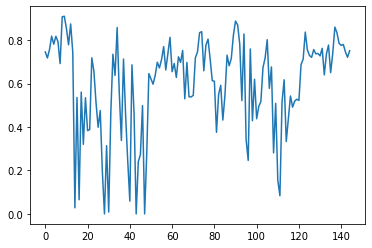

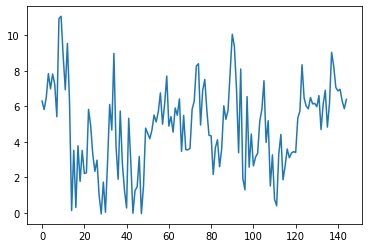

In [29]:
plt.plot(dist.cdf(v))
plt.show()
plt.plot(df['Velocidad'])
plt.show()

In [37]:
df_aux = pd.read_csv(path_save + 'data_Carcaixent_2', sep=';', index_col=0)
df = pd.read_csv(path + 'data_Carcaixent', sep=';', index_col=0)
df['Theta'] = df_aux['Theta'].copy()
df.to_csv(path_save + 'data_Carcaixent', sep = ";", decimal = ".", index = True)

In [38]:
df_aux = pd.read_csv(path + 'data_Llutxent_2', sep=';')
df = pd.read_csv(path + 'data_Llutxent', sep=';')
df['Direccion'] = df_aux['Direccion'].copy()
df.to_csv(path_save + 'data_Llutxent', sep = ";", decimal = ".", index = True)